In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [69]:
hse_06 = pd.read_csv('../../data/datasets_main/train_hse06.csv')
stoich45_fingerprints = pd.read_csv('../../data/datasets_main/stoich120_fingerprints.csv')
stoich120_fingerprints = pd.read_csv('../../data/datasets_main/stoich120_fingerprints.csv')

In [70]:
df_stoich_hse_06 = hse_06 \
    .merge(stoich45_fingerprints, left_on='qmof_id', right_on='MOF', how='left') \
    .merge(stoich120_fingerprints, left_on='qmof_id', right_on='MOF', how='left')

# Drop the 'qmof_id' column
df_stoich_hse_06.drop(columns=['qmof_id'], inplace=True)

In [71]:
df_stoich_hse_06.head() # Display the first few rows of the DataFrame

,inputs.hse06.theory,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume,...,range Electronegativity_y,mean Electronegativity_y,avg s valence electrons_y,avg p valence electrons_y,avg d valence electrons_y,avg f valence electrons_y,frac s valence electrons_y,frac p valence electrons_y,frac d valence electrons_y,frac f valence electrons_y
0,HSE06,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880,...,2.33,2.636667,1.666667,1.769231,0.256410,0.000000,0.451389,0.479167,0.069444,0.000000
1,HSE06,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968,...,1.79,2.522239,1.626866,1.477612,0.149254,0.000000,0.500000,0.454128,0.045872,0.000000
2,HSE06,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082,...,2.31,2.560000,1.671642,1.641791,0.000000,0.044776,0.497778,0.488889,0.000000,0.013333
3,HSE06,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244,...,2.08,2.679429,1.742857,2.171429,0.285714,0.000000,0.414966,0.517007,0.068027,0.000000
4,HSE06,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068,...,1.51,2.470577,1.538462,1.269231,0.192308,0.000000,0.512821,0.423077,0.064103,0.000000


Our dataframe has 8648 rows and 282 columns.

In [72]:
df_stoich_hse_06.to_csv('../../data/datasets_main/stoich_fingerprints.csv', index=False) # Save the DataFrame to a CSV file

In [73]:
df_stoich_fingerprints_numercal = df_stoich_hse_06.select_dtypes(include=[np.number]) 

In [74]:
df_stoich_fingerprints_numercal.head() # Display the first few rows of the DataFrame containing only numeric columns

,outputs.hse06.bandgap,info.natoms,info.pld,info.lcd,info.density,info.volume,H fraction_x,He fraction_x,Li fraction_x,Be fraction_x,...,range Electronegativity_y,mean Electronegativity_y,avg s valence electrons_y,avg p valence electrons_y,avg d valence electrons_y,avg f valence electrons_y,frac s valence electrons_y,frac p valence electrons_y,frac d valence electrons_y,frac f valence electrons_y
0,4.988289,78,1.37489,2.13029,1.693758,822.916880,0.333333,0,0.0,0.0,...,2.33,2.636667,1.666667,1.769231,0.256410,0.000000,0.451389,0.479167,0.069444,0.000000
1,3.196302,134,1.20752,2.66721,1.453964,1409.227968,0.373134,0,0.0,0.0,...,1.79,2.522239,1.626866,1.477612,0.149254,0.000000,0.500000,0.454128,0.045872,0.000000
2,3.617418,134,1.20601,2.81754,1.683856,1450.490082,0.328358,0,0.0,0.0,...,2.31,2.560000,1.671642,1.641791,0.000000,0.044776,0.497778,0.488889,0.000000,0.013333
3,3.220291,35,3.04146,3.91264,1.469086,568.352244,0.228571,0,0.0,0.0,...,2.08,2.679429,1.742857,2.171429,0.285714,0.000000,0.414966,0.517007,0.068027,0.000000
4,2.436139,104,1.22817,2.05442,1.729977,935.476068,0.442308,0,0.0,0.0,...,1.51,2.470577,1.538462,1.269231,0.192308,0.000000,0.512821,0.423077,0.064103,0.000000


In [75]:

corr_matrix = df_stoich_fingerprints_numercal.corr()
target_corr = corr_matrix['outputs.hse06.bandgap'].sort_values(ascending=False)
print(target_corr) # Display the correlation with the target variable

outputs.hse06.bandgap        1.000000
range Electronegativity_x    0.307268
range Electronegativity_y    0.307268
O fraction_y                 0.305048
O fraction_x                 0.305048
                               ...   
Fl fraction_y                     NaN
Mc fraction_y                     NaN
Lv fraction_y                     NaN
Ts fraction_y                     NaN
Og fraction_y                     NaN
Name: outputs.hse06.bandgap, Length: 276, dtype: float64


outputs.hse06.bandgap        1.000000
range Electronegativity_x    0.307268
range Electronegativity_y    0.307268
O fraction_y                 0.305048
O fraction_x                 0.305048
                               ...   
Fl fraction_y                     NaN
Mc fraction_y                     NaN
Lv fraction_y                     NaN
Ts fraction_y                     NaN
Og fraction_y                     NaN
Name: outputs.hse06.bandgap, Length: 276, dtype: float64


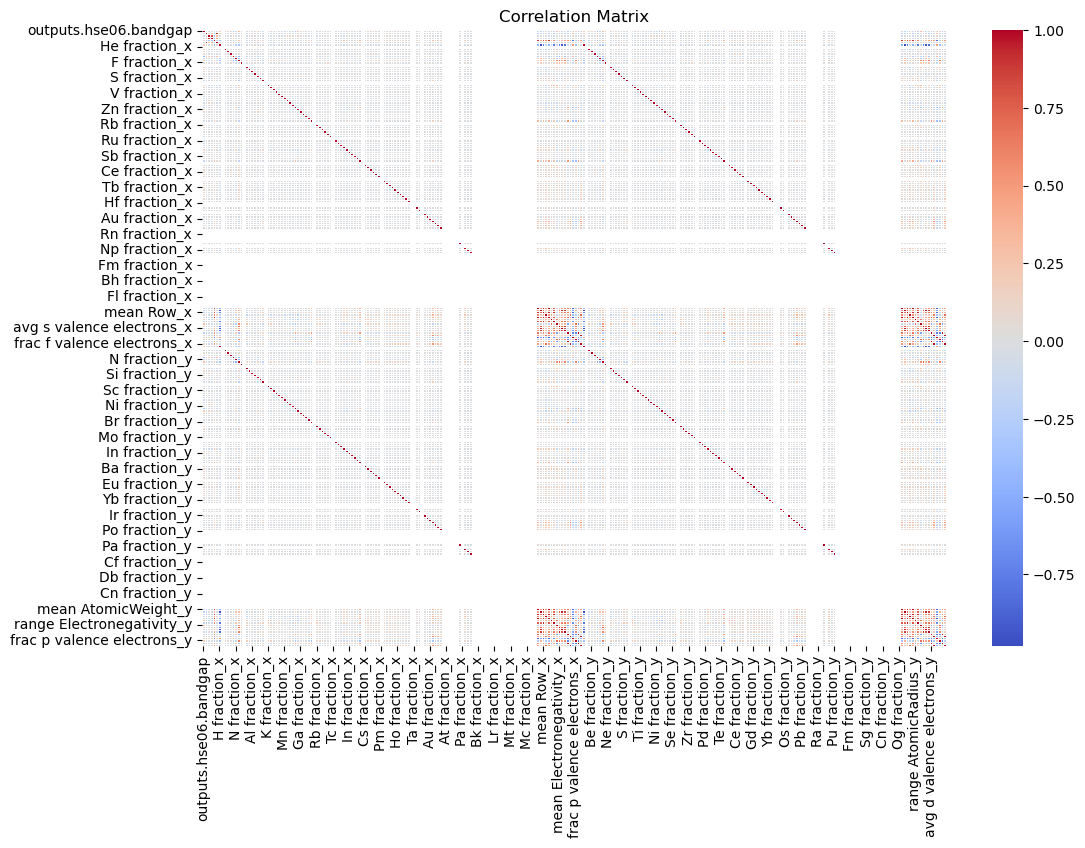

In [76]:
# Display the correlations with the target variable
print(target_corr)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [77]:
df_stoich_hse_06.drop(columns=[ 'inputs.hse06.theory','MOF_x','MOF_y'], inplace=True)

In [78]:

df_stoich_hse_06.drop(columns=df_stoich_hse_06.filter(regex='info.*').columns, inplace=True)

Variances of features:
outputs.hse06.bandgap         1.136205e+00
H fraction_x                  6.530524e-03
He fraction_x                 0.000000e+00
Li fraction_x                 7.725591e-05
Be fraction_x                 2.106916e-07
                                  ...     
avg f valence electrons_y     3.188611e-02
frac s valence electrons_y    2.550559e-03
frac p valence electrons_y    2.797504e-03
frac d valence electrons_y    6.028389e-03
frac f valence electrons_y    1.359509e-03
Length: 271, dtype: float64

Low variance features:
Index(['He fraction_x', 'Li fraction_x', 'Be fraction_x', 'B fraction_x',
       'F fraction_x', 'Ne fraction_x', 'Na fraction_x', 'Mg fraction_x',
       'Al fraction_x', 'Si fraction_x',
       ...
       'Nh fraction_y', 'Fl fraction_y', 'Mc fraction_y', 'Lv fraction_y',
       'Ts fraction_y', 'Og fraction_y', 'mean AtomicRadius_y',
       'frac s valence electrons_y', 'frac p valence electrons_y',
       'frac f valence electrons_y'],
      dt

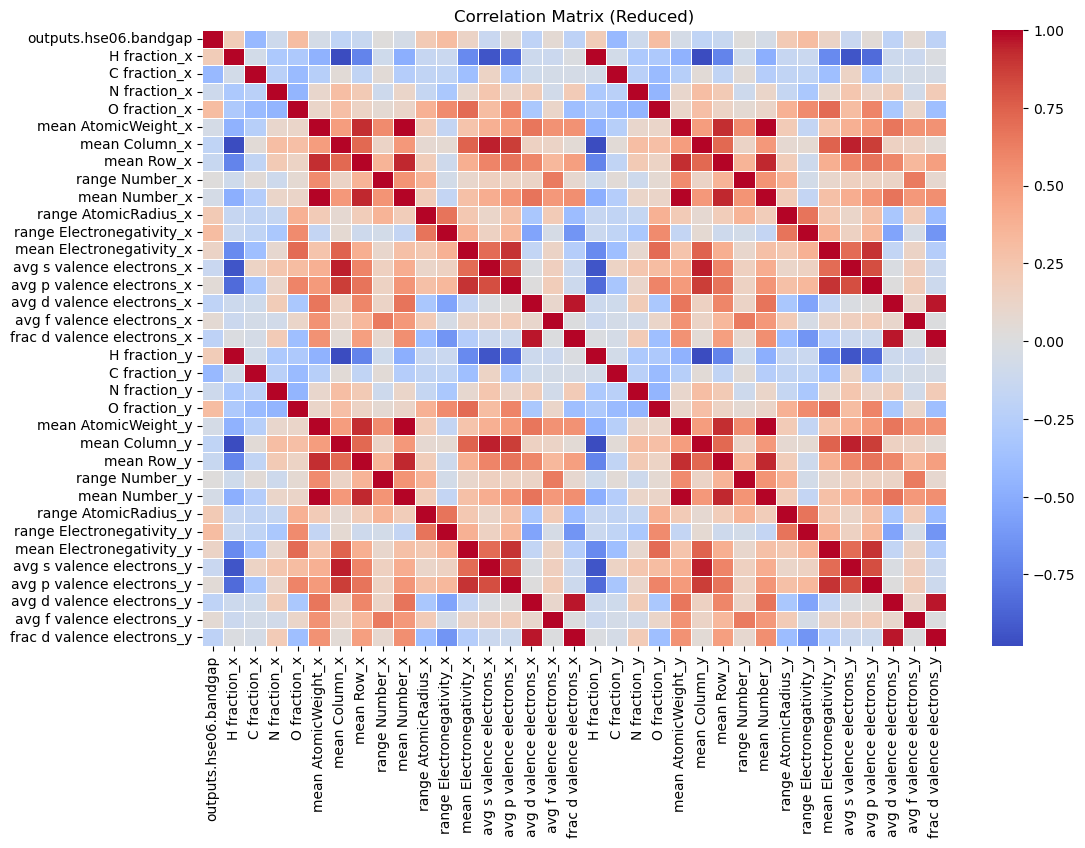

In [79]:
# Calculate the variance of each feature
variances = df_stoich_hse_06.var()

# Display the variances
print("Variances of features:")
print(variances)

# Identify low variance features (e.g., variance below a threshold)
threshold = 0.005  # adjust this threshold based on the dataset
low_variance_features = variances[variances < threshold].index

print("\nLow variance features:")
print(low_variance_features)

# Drop low variance features from the DataFrame
df_hse06_stoich_reduced = df_stoich_hse_06.drop(columns=low_variance_features)

# Calculate the correlation matrix for the reduced DataFrame
corr_matrix_reduced = df_hse06_stoich_reduced.corr()

# Plot the correlation matrix for the reduced DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_reduced, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix (Reduced)')
plt.show()

In [80]:
#  Mean decrease in impurity using the random forest model for feature importance
from sklearn.ensemble import RandomForestRegressor


# Drop the target variable from the DataFrame
X = df_stoich_hse_06.drop(columns=['outputs.hse06.bandgap'])
y = df_stoich_hse_06['outputs.hse06.bandgap']


# Create a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X, y)


feature_importances = rf.feature_importances_


column_names = X.columns


feature_importances_df = pd.DataFrame({'feature': column_names, 'importance': feature_importances})


feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)


print(feature_importances_df)

           feature  importance
5     C fraction_x    0.112717
140   C fraction_y    0.111830
163  Cu fraction_y    0.059143
28   Cu fraction_x    0.058189
141   N fraction_y    0.034529
..             ...         ...
231  Bk fraction_y    0.000000
233  Es fraction_y    0.000000
234  Fm fraction_y    0.000000
9    Ne fraction_x    0.000000
1    He fraction_x    0.000000

[270 rows x 2 columns]


C:\Users\student\AppData\Local\Temp\ipykernel_18668\3360745055.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature', y='importance', data=feature_importances_df, palette='viridis')  # Use only DataFrame


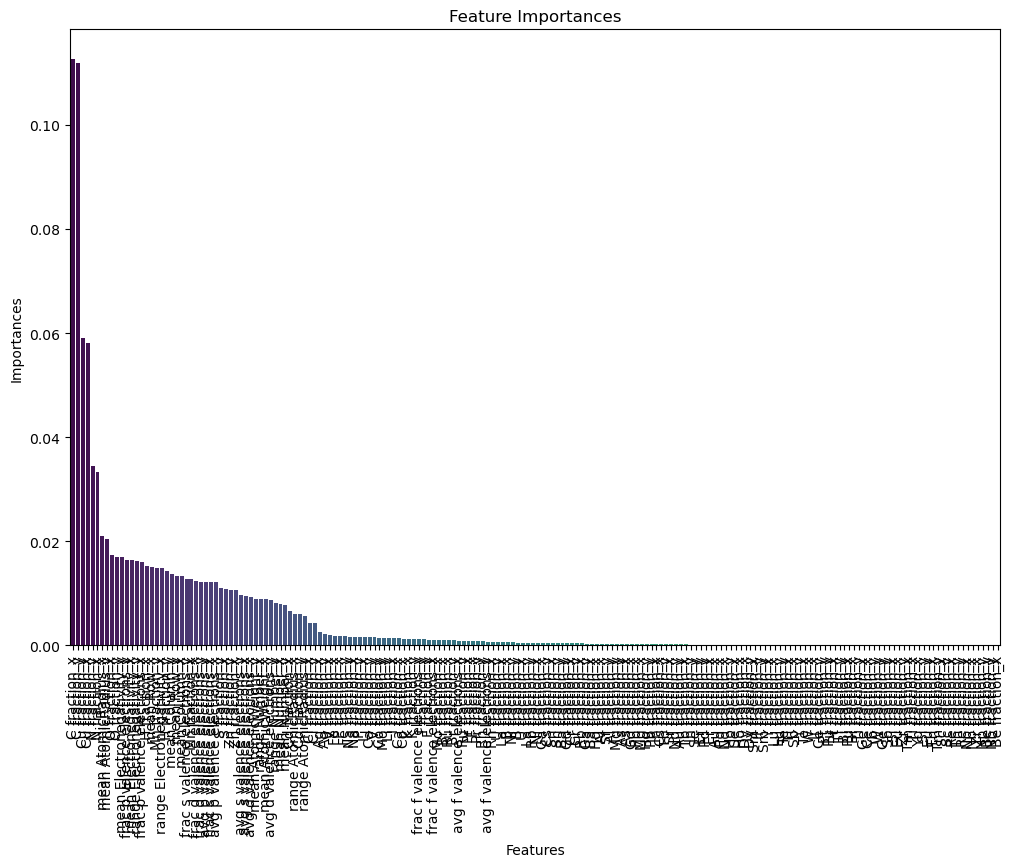

In [81]:
# Plot the feature importances >0
feature_importances_df = feature_importances_df[feature_importances_df['importance'] > 0]

plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='importance', data=feature_importances_df, palette='viridis')  # Use only DataFrame
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [85]:

print(df_stoich_hse_06.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich_for_pca = df_stoich_hse_06.dropna()

# Print number of rows dropped
print('number of rows dropped:') # Print NaN values in the DataFrame
print(df_stoich_hse_06.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich_for_pca = df_stoich_hse_06.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_stoich_hse_06.shape[0] - df_hse06_stoich_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich_for_pca.shape)

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich_for_pca.shape)

df_hse06_stoich_for_pca.columns

outputs.hse06.bandgap         0
H fraction_x                  0
He fraction_x                 0
Li fraction_x                 0
Be fraction_x                 0
                             ..
avg f valence electrons_y     0
frac s valence electrons_y    0
frac p valence electrons_y    0
frac d valence electrons_y    0
frac f valence electrons_y    0
Length: 271, dtype: int64
number of rows dropped:
outputs.hse06.bandgap         0
H fraction_x                  0
He fraction_x                 0
Li fraction_x                 0
Be fraction_x                 0
                             ..
avg f valence electrons_y     0
frac s valence electrons_y    0
frac p valence electrons_y    0
frac d valence electrons_y    0
frac f valence electrons_y    0
Length: 271, dtype: int64
number of rows dropped: 0
number of rows and columns after dropping NaNs: (8648, 271)
number of rows and columns after dropping NaNs: (8648, 271)


Index(['outputs.hse06.bandgap', 'H fraction_x', 'He fraction_x',
       'Li fraction_x', 'Be fraction_x', 'B fraction_x', 'C fraction_x',
       'N fraction_x', 'O fraction_x', 'F fraction_x',
       ...
       'range Electronegativity_y', 'mean Electronegativity_y',
       'avg s valence electrons_y', 'avg p valence electrons_y',
       'avg d valence electrons_y', 'avg f valence electrons_y',
       'frac s valence electrons_y', 'frac p valence electrons_y',
       'frac d valence electrons_y', 'frac f valence electrons_y'],
      dtype='object', length=271)

## No NAN values

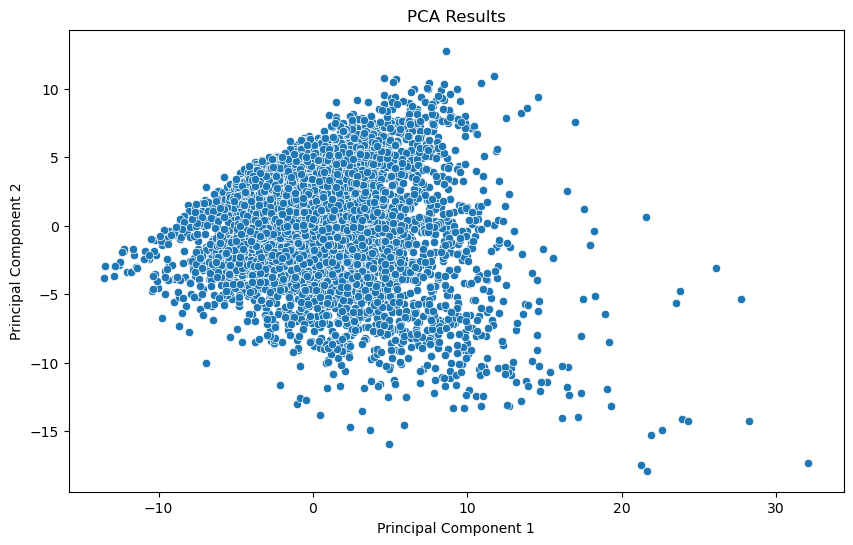

In [88]:
# PCA analysis
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the features. Exclude the target variable
X = df_hse06_stoich_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [89]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Loadings (coefficients of the original features in the principal components)
loadings = pca.components_
print("Loadings:", loadings)

Explained variance ratio: [0.09013394 0.06575372]
Loadings: [[-1.77453767e-01 -1.11022302e-16 -2.65995571e-02 -3.49335823e-07
  -2.31280322e-03 -5.21003498e-02  5.01912214e-02  5.39732777e-02
   2.62885351e-02 -2.64697796e-23 -1.61300804e-02 -1.17396797e-02
   3.62698665e-03 -1.22429907e-02  6.23724997e-03  3.86556781e-02
   2.99078316e-02  0.00000000e+00  1.08116632e-02 -9.42954171e-03
   1.45179028e-03  6.35773281e-04  1.16981204e-02  4.23922698e-04
  -5.77951486e-03  3.38989626e-03 -1.01523789e-02 -1.40016396e-02
   4.00481710e-02 -8.51048144e-03  6.08076067e-03 -1.93588030e-03
   7.57391223e-03  1.15125718e-02  6.55510831e-02  0.00000000e+00
   1.22160324e-02  1.16655650e-03  9.73783074e-04  1.13153874e-03
   5.18078980e-03  1.78560571e-02  0.00000000e+00  1.54480933e-03
   5.11404051e-04  9.53217697e-05  4.44903832e-02  2.51275164e-02
   4.41535270e-03 -2.16303611e-03  1.68058815e-02  3.82721421e-03
   6.94355202e-02  0.00000000e+00  1.77385425e-02  1.03699398e-02
   7.75828968e-0